In [1]:
import numpy as np
import netCDF4 as nc
import pyfesom2 as pf
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cmocean

In [2]:
path = '/home/a/a270075/ba0989/awiesm2.5/experiments-2/'
exp = 'tran20-24k-new04'

years2 = np.arange(-24000, 0, 100)

thk = np.zeros((len(years2), 600,600))
topg = np.zeros((len(years2), 600,600))

tt = 140

with nc.MFDataset(path+exp+'/restart/pism/*_pismr_restart_*.nc', 'r') as ff:
    x = ff.variables['x'][:] 
    y = ff.variables['y'][:] 
    thk[:tt,:,:] = ff.variables['thk'][:tt,:,:]
    topg[:tt,:,:] = ff.variables['topg'][:tt,:,:]

exp = 'tran20-10k-new04v2'
with nc.MFDataset(path+exp+'/restart/pism/*_pismr_restart_*.nc', 'r') as ff:
    thk[tt:,:,:] = ff.variables['thk'][:tt,:,:]
    topg[tt:,:,:] = ff.variables['topg'][:tt,:,:]
    

In [3]:
thknew = np.ma.masked_where(thk<1., thk)
usurf = thk + topg

[   0 1000 2000 3000 4000]
pro4_params:  {'ellps': 'WGS84', 'proj': 'stere', 'lat_0': 90, 'lon_0': -45, 'x_0': 0.0, 'y_0': 0.0, 'lat_ts': 70.0}
[-5990000.0, 5990000.0, 5990000.0, -5990000.0]
[-5990000.0, 5990000.0, 5990000.0, -5990000.0]
-23000
-22000
-21000
-20000
-19000
-18000
-17000
-16000
-15000
-14000
-13000
-12000
-11000
-10000
-9000
-8000


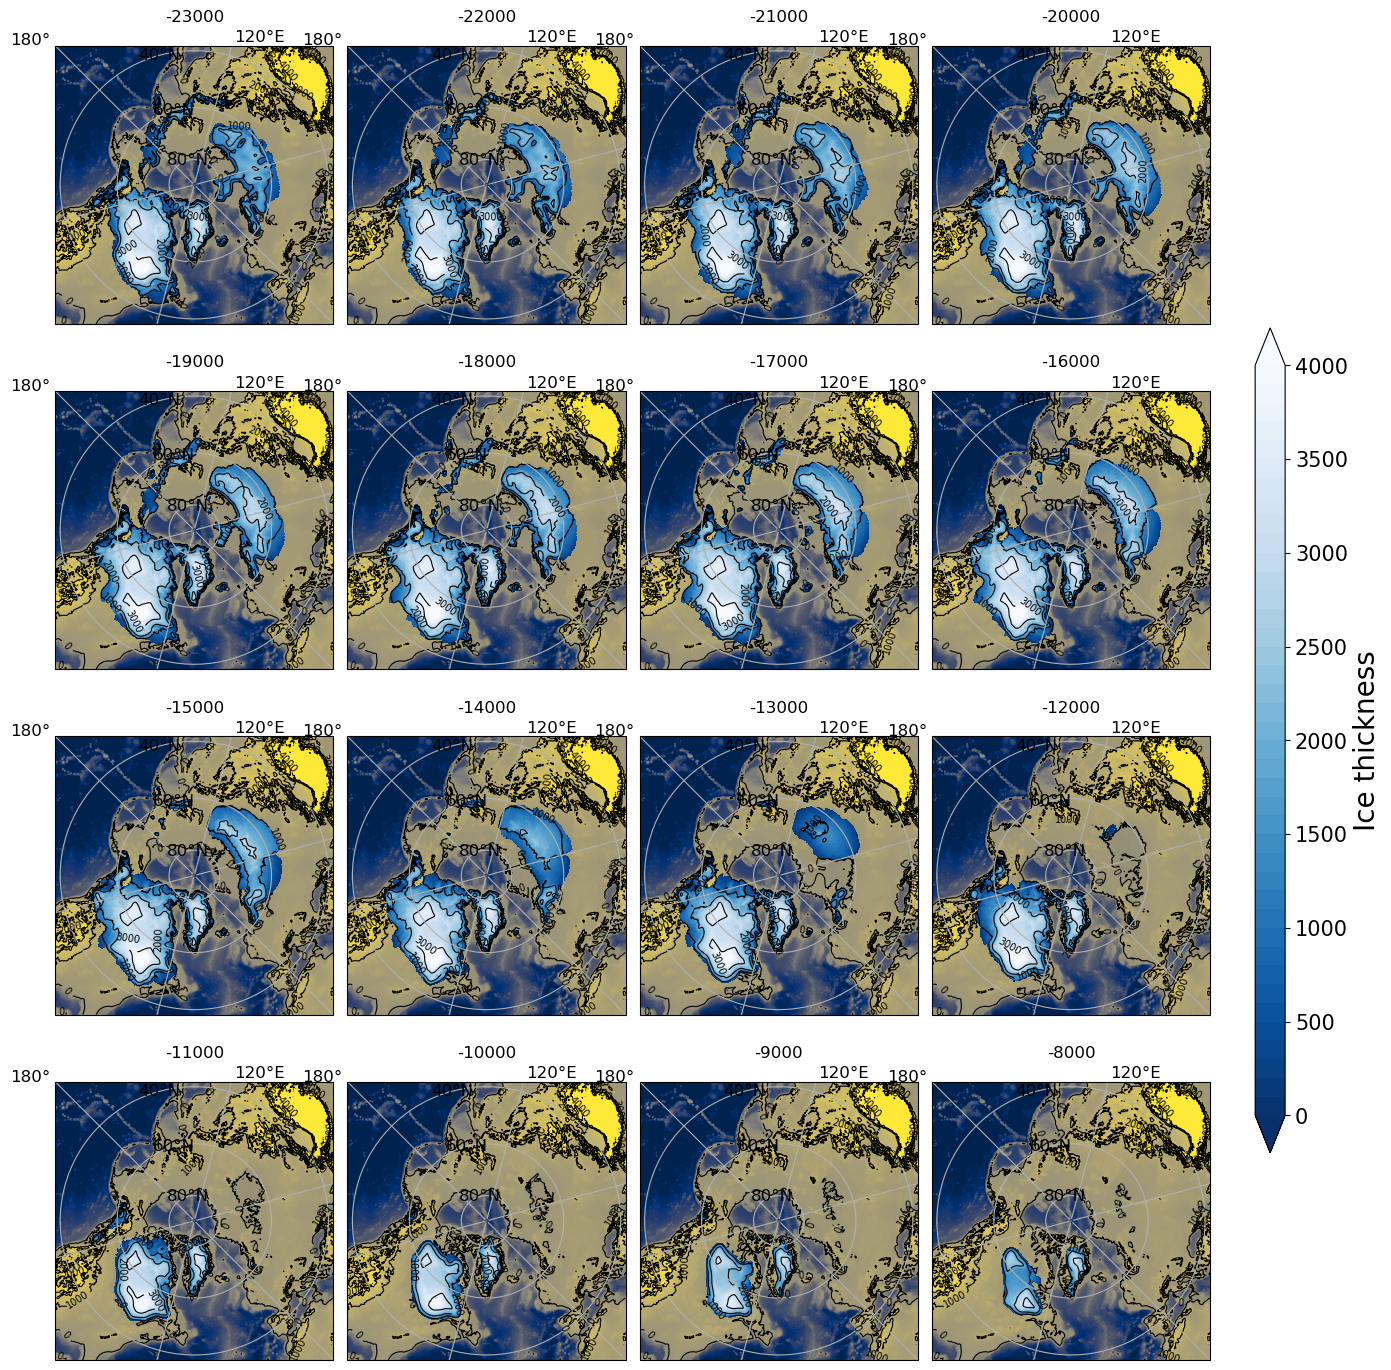

In [11]:
### definition for plots
minval = 0
maxval = 4000
nbreaks = 41

breaks = np.linspace(minval,maxval,nbreaks)
color = plt.cm.Blues_r  #jet #viridis   #  #ocean  #cubehelix viridis  #
color2 = plt.cm.cividis #   #gray #gist_earth #cividis #gray_r
breaks2 = np.linspace(-5000,3000,81)
breaks3 = np.arange(0,5000,1000)
print(breaks3)


projection = ccrs.NorthPolarStereo(central_longitude= -45,true_scale_latitude=70.,globe=None)
projection2 = ccrs.NorthPolarStereo(central_longitude= -45,true_scale_latitude=70.,globe=None)

print('pro4_params: ',projection.proj4_params)

new_extent = [np.min(x), np.max(x), np.max(y), np.min(y)]
print(new_extent)
plot_extent = new_extent
print(plot_extent)

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(left=0.05,right=0.82, top=0.95, bottom=0.05, hspace=0.1,wspace=0.05)

for i in range(0, 16):
    ttt = i*10+10 
    print(years2[ttt])
    ax = fig.add_subplot(4,4,i+1, projection=projection2)
    ax.set_extent(plot_extent,projection)
    cs = plt.contourf(x,y, topg[ttt], transform=projection,extent=new_extent, extend='both', cmap=color2 , levels=breaks2)  #colors='grey'
    cs2 = plt.contourf(x,y, thknew[ttt],transform=projection,extent=new_extent,extend='both',cmap=color,levels=breaks,vmin=minval,vmax=maxval)
    cs3 = plt.contour(x,y,usurf[ttt],transform=projection,extent=new_extent, colors='black', levels=breaks3,linewidths=0.8 )
    plt.clabel(cs3,  fontsize=7)
    ax.set_title(years2[ttt])
    # ax.coastlines()

    # grid lines
    gl = ax.gridlines(draw_labels=True) #, linewidth=2, alpha=0.4, color='k', linestyle=':')
    gl.xlines = True
    gl.ylines = True #False
    gl.xlocator = mticker.FixedLocator(np.arange(-180,180, 60 ))
    gl.ylocator = mticker.FixedLocator(np.arange(0,90, 20 ))
    gl.bottom_labels = False
    #gl.right_labels = False
    gl.xlabel_style = {'size': 12, 'color': 'black','rotation':0 } #'weight': 'bold'}
    gl.ylabel_style = {'size': 12, 'color': 'black',  } #'weight': 'bold'}

###### colorbar 
cax = plt.axes([0.85, 0.2,0.02, 0.55])
# cbar = plt.colorbar(cs, cax=cax,orientation='horizontal',fraction=0.05,pad=0.03,  label='Bathymetry (m)')
cbar = plt.colorbar(cs2, cax=cax,orientation='vertical',fraction=0.05,pad=0.03)
cbar.set_label(label='Ice thickness', size=20) #, weight='bold')
cbar.ax.tick_params(labelsize=15)
#fig.text(0.35,0.93,'Ice thickness at 21k',fontsize=20)

plt.savefig('4_thk.png',bbox_inches='tight',)
# plt.show()
# plt.close()